In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Assignment 1


# Creating a dictionary using comprehension
data = {f'Col{i}': np.random.randint(1, 100, 6) for i in range(4)}

print(data)
# Creating the DataFrame
df = pd.DataFrame(data)
# Setting the first column as the index
df.set_index(df.columns[0], inplace=True)
print(df)


In [ ]:
# creating random data
data = {
    'A':np.random.randint(1,100,3),
    'B':np.random.randint(1,100,3),
    'C':np.random.randint(1,100,3)
}

"""
np.random.seed(42)  # For reproducibility
df = pd.DataFrame(np.random.randint(1, 100, size=(3, 3)), 
                  columns=['A', 'B', 'C'], 
                  index=['X', 'Y', 'Z'])"""

# creating dataframe from dictionary
index = ['X','Y','Z']
df = pd.DataFrame(data, index=index)
print(df)

print("Value at row Y and column B is :",df.loc['Y','B'])       # label- based selection

In [ ]:
# Assignment 2

np.random.seed(42)
df = pd.DataFrame(np.random.randint(1, 100, size=(3, 5)))

df.columns=['A','B','C','D','E']

#df['Sum'] = df.iloc[:,0] + df.iloc[:,1]

#df['Sum'] = df['A'] + df['B']

df['Sum'] = df[['A','B']].sum(axis=1)
print(df)

In [131]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(1, 100, size=(3, 4)), columns=['A','B','C','D'])
# column wise sumation

Col_sum = {}
for i in df.columns:
    #print(f"Sum of column {i} is:",df[i].sum())
    Col_sum[i] = sum(df[i])
print(pd.Series(Col_sum,name="column sum"))

# row wise sumation
df['Row_Sum'] = df.sum(axis=1)
print(df)

A    188
B    189
C    186
D    183
Name: column sum, dtype: int64
    A   B   C   D  Row_Sum
0  52  93  15  72      232
1  61  21  83  87      252
2  75  75  88  24      262


In [20]:
# Assignment 3

#np.random.seed(42)
df = pd.DataFrame(np.random.randint(1, 100, size=(4, 3)), columns=list('ABC'))
nan_matrix = np.random.choice([True,False], size=df.shape, p=[0.2,0.8])      # creating a same size matrix as df to introduce nan in df
df[nan_matrix] = np.nan             # if true convert to nan, if false remains same
print(df)

      A     B   C
0   NaN   NaN  15
1  45.0  65.0  89
2  71.0   9.0  88
3   1.0   NaN  88


In [21]:
print(df.isnull().sum())

A    1
B    2
C    0
dtype: int64


In [22]:
df.dropna(inplace=True)
df

,A,B,C
1,45.0,65.0,89
2,71.0,9.0,88


In [46]:
# Assignment 4
np.random.seed(42)
df = pd.DataFrame(columns=["Id","Category","Value"])
df['Id'] = [1,2,3,4,5,6,7,8]
df['Category'] = np.random.choice(['A','B','C'], size=len(df))
df['Value'] = np.random.randint(1,100, size=len(df))       
print(df)
aggregated_data = df.groupby("Category")['Value'].agg(['sum','mean'])
print(aggregated_data)


   Id Category  Value
0   1        C     83
1   2        A     87
2   3        C     75
3   4        C     75
4   5        A     88
5   6        A     24
6   7        C      3
7   8        B     22
          sum       mean
Category                
A         199  66.333333
B          22  22.000000
C         236  59.000000


       Product     Category  Total_Sales
0         Milk      Grocery           24
1        Chair    Furniture            3
2       Laptop  Electronics           22
3        Bread      Grocery           53
4         Eggs      Grocery            2
5         Desk    Furniture           88
6        Phone  Electronics           30
7   Headphones  Electronics           38
8         Eggs      Grocery            2
9        Pants     Clothing           64
10        Milk      Grocery           60
11        Eggs      Grocery           21
12        Milk      Grocery           33
13        Eggs      Grocery           76
14        Desk    Furniture           58

 Category
Clothing        64
Electronics     90
Furniture      149
Grocery        271
Name: Total_Sales, dtype: int32
Total furniture sales are: 149
Chair sales is: 3


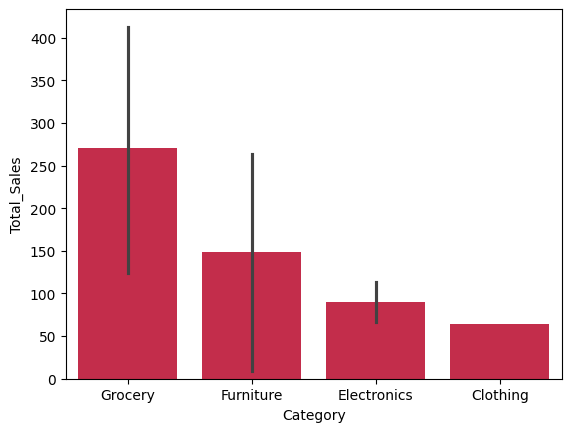

In [78]:
np.random.seed(42)
df = pd.DataFrame(index=range(15), columns=["Product","Category","Sales"])
df['Category'] = np.random.choice(['Electronics','Clothing','Grocery','Furniture'], size=len(df))
df['Sales'] = np.random.randint(1,100, size=len(df))

# Dictionary that maps categories to a list of products - tells which products belong to which category.
product_mapping = {
    'Electronics' : ['Laptop','Headphones','Phone'],
    'Clothing' : ['Shirt','Pants','Dress'],
    'Grocery' : ['Bread','Milk','Eggs'],
    'Furniture' : ['Chair','Table','Desk']
}

df = df.rename(columns={'Sales':'Total_Sales'})

# Apply function: For each row, pick a random product from (product_mapping) the matching category
df['Product'] = df['Category'].map(lambda cat: np.random.choice(product_mapping[cat]))
print(df)

total_sales = df.groupby('Category')['Total_Sales'].sum()
print("\n",total_sales)

total_furniture_sale = df.loc[df['Category']=='Furniture','Total_Sales'].sum()       # for calculating the sales for a specific category
print(f"Total furniture sales are: {total_furniture_sale}")

chair_sales = df.loc[(df['Category']=='Furniture') & (df['Product']=='Chair'),'Total_Sales'].sum()
print(f"Chair sales is: {chair_sales}")

sns.barplot(x='Category', y='Total_Sales', estimator=sum, color='crimson', data=df)
plt.show()

In [ ]:
# Assignment 5
# merge with same columns
df1 = pd.DataFrame({'Key':['A','B','C'], 'Value': [1,2,3]})
df2 = pd.DataFrame({'Key':['A','B','D'], 'Value': [4,5,6]})
print("dataframe 1: \n",df1)
print("dataframe 2: \n",df2)

dataframe 1: 
   Key  Value
0   A      1
1   B      2
2   C      3
dataframe 2: 
   Key  Value
0   A      4
1   B      5
2   D      6


In [74]:
merged_df = pd.merge(df1,df2, on='Key', how='outer')
print(merged_df)

  Key  Value_x  Value_y
0   A      1.0      4.0
1   B      2.0      5.0
2   C      3.0      NaN
3   D      NaN      6.0


In [81]:
# merge with different columns
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [4,5,6]})
df2 = pd.DataFrame({'C': [7, 8], 'D': [10,11]})
print("dataframe 1: \n",df1)
print("dataframe 2: \n",df2)

dataframe 1: 
    A  B
0  1  4
1  2  5
2  3  6
dataframe 2: 
    C   D
0  7  10
1  8  11


In [86]:
# along rows
merged_df = pd.concat([df1,df2], axis=0)
print(merged_df)

# along columns
merged_df = pd.concat([df1,df2], axis=1)
print("\n",merged_df)

     A    B    C     D
0  1.0  4.0  NaN   NaN
1  2.0  5.0  NaN   NaN
2  3.0  6.0  NaN   NaN
0  NaN  NaN  7.0  10.0
1  NaN  NaN  8.0  11.0

    A  B    C     D
0  1  4  7.0  10.0
1  2  5  8.0  11.0
2  3  6  NaN   NaN


In [ ]:
# Assignment 6

date_range = pd.date_range(start="01-01-2025",periods=31, freq='D')
df = pd.DataFrame({'Date': date_range,'Data': np.random.randint(0,100, len(date_range))})
print(df)

In [101]:
df.set_index('Date',inplace=True)

In [103]:
monthly_mean = df.resample('ME').mean()
print(monthly_mean)

                 Data
Date                 
2025-01-31  44.709677


In [113]:
date_range = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')
df = pd.DataFrame(np.random.randint(0,100, len(date_range)), columns=['Data'], index=date_range)

df["monthly_rolling"] = df["Data"].rolling(window=7).mean()
df.head(10)

,Data,monthly_rolling
2021-01-01,29,NaN
2021-01-02,24,NaN
2021-01-03,83,NaN
2021-01-04,4,NaN
2021-01-05,64,NaN
2021-01-06,93,NaN
2021-01-07,48,49.285714
2021-01-08,2,45.428571
2021-01-09,44,48.285714
2021-01-10,13,38.285714


In [126]:
# Assignment 9 
np.random.seed(42)
df = pd.DataFrame(np.random.randint(0,100, size=(3,5)), columns=['A','B','C','D','E'])
print("dataframe before doubling the value")
print(df.head(5))
print("dataframe after doubling the value")
df_doubled = df.map(lambda x : x*2)
print(df_doubled.head(5))

dataframe before doubling the value
    A   B   C   D   E
0  51  92  14  71  60
1  20  82  86  74  74
2  87  99  23   2  21
dataframe after doubling the value
     A    B    C    D    E
0  102  184   28  142  120
1   40  164  172  148  148
2  174  198   46    4   42


In [3]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(1, 100, size=(6, 3)), columns=['A', 'B', 'C'])
print("Original DataFrame:")
print(df)

# Apply a lambda function to create a new column that is the sum of the existing columns
df['Sum'] = df.apply(lambda row: row.sum(), axis=1)
print("DataFrame with Sum column:")
print(df)

Original DataFrame:
    A   B   C
0  52  93  15
1  72  61  21
2  83  87  75
3  75  88  24
4   3  22  53
5   2  88  30
DataFrame with Sum column:
    A   B   C  Sum
0  52  93  15  160
1  72  61  21  154
2  83  87  75  245
3  75  88  24  187
4   3  22  53   78
5   2  88  30  120


In [7]:
# Assignment 10

text_data = pd.Series(['goku','vegeta','broly','gohan','trunks'])
print("Original series:")
print(text_data)
text_data = text_data.str.upper()
print("Uppercase data:")
print(text_data)

Original series:
0      goku
1    vegeta
2     broly
3     gohan
4    trunks
dtype: object
Uppercase data:
0      GOKU
1    VEGETA
2     BROLY
3     GOHAN
4    TRUNKS
dtype: object


In [9]:
text_data = pd.Series(['gojo','geto','itadori','fushiguro','sakuna'])
print("Original data:")
print(text_data)
first_three_char = text_data.str[:3]
print("First three characters data:")
print(first_three_char)

Original data:
0         gojo
1         geto
2      itadori
3    fushiguro
4       sakuna
dtype: object
First three characters data:
0    goj
1    get
2    ita
3    fus
4    sak
dtype: object


In [ ]:
# Assignment 8
np.random.seed(42)
date_range = pd.date_range(start='2025-01-01', end='2025-01-10', freq='D')
print(date_range)
df = pd.DataFrame({'Date': np.random.choice(date_range, size=20), 'Category': np.random.choice(['A','B','C'], size=20),
                   'Value': np.random.randint(1,100, size=20)})
print("Original data")
print(df)
pivot_table = pd.pivot_table(df, index='Date', columns='Category', aggfunc="sum")
print("Pivot table:")
print(pivot_table)

In [37]:
df = pd.DataFrame({'Year': np.random.choice([2020, 2021, 2022], size=12), 'Quarter': np.random.choice(['Q1', 'Q2', 'Q3', 'Q4'], size=12), 'Revenue': np.random.randint(1, 1000, size=12)})
print("Original DataFrame:")
print(df)

# Create a pivot table to compute the mean 'Revenue' for each 'Quarter' by 'Year'
pivot_table = df.pivot_table(values='Revenue', index='Year', columns='Quarter', aggfunc='mean')
print("Pivot Table:")
print(pivot_table)

Original DataFrame:
    Year Quarter  Revenue
0   2022      Q3      456
1   2022      Q2      462
2   2021      Q2      727
3   2020      Q4      252
4   2021      Q2      702
5   2021      Q2      296
6   2021      Q2      725
7   2021      Q4      720
8   2021      Q2      749
9   2021      Q3      338
10  2021      Q4      879
11  2020      Q3       53
Pivot Table:
Quarter     Q2     Q3     Q4
Year                        
2020       NaN   53.0  252.0
2021     639.8  338.0  799.5
2022     462.0  456.0    NaN
